### Risk Management and Portfolio optimization

##### Algunos conceptos que vamos a ver en esta notebook son:

* Análisis de retornos y de volumen. Algunas conclusiones.
* Distribución de los retornos. Percentiles y quantiles. ¿Qué cosas ver?
* Varianza, desvío estandar (volatilidad) - Indicadores financieros (oscilador de volatilida y radio de volatilidad)
* Correlación, covarianza.
* Introducción a la optimización de portafolios. Ratio de sharpe (media anualizada / volatilidad anualizada)
* Cálculo de medidas de riesgo

In [1]:
# Importamos las librerías que vamos a estar utilizando
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import plotly.express as px

In [2]:
# visualizamos todas las columnas de los métodos en análisis 
pd.set_option('display.max_columns', None)

In [3]:
# Lo primero que hacemos es descargar la información de las acciones que vamos a analizar
assets = ['SPY','XLK','XLF','XLE']
data = yf.download(assets, end = '2024-02-13', auto_adjust=True)
data

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[**********************50%%                      ]  2 of 4 completed/h

Price            Close                                          High  \
Ticker             SPY        XLE        XLF         XLK         SPY   
Date                                                                   
1993-01-29   24.840679        NaN        NaN         NaN   24.858347   
1993-02-01   25.017363        NaN        NaN         NaN   25.017363   
1993-02-02   25.070364        NaN        NaN         NaN   25.088032   
1993-02-03   25.335358        NaN        NaN         NaN   25.353025   
1993-02-04   25.441387        NaN        NaN         NaN   25.494390   
...                ...        ...        ...         ...         ...   
2024-02-06  493.980011  83.580002  38.830002  201.770004  494.320007   
2024-02-07  498.100006  83.750000  39.119999  204.440002  498.529999   
2024-02-08  498.320007  84.610001  38.970001  205.080002  498.709991   
2024-02-09  501.200012  83.309998  39.080002  207.839996  501.649994   
2024-02-12  500.980011  84.230003  39.259998  206.259995  503.500000   

Price                                                Low             \
Ticker            XLE        XLF         XLK         SPY        XLE   
Date                                                                  
1993-01-29        NaN        NaN         NaN   24.734673        NaN   
1993-02-01        NaN        NaN         NaN   24.858354        NaN   
1993-02-02        NaN        NaN         NaN   24.946691        NaN   
1993-02-03        NaN        NaN         NaN   25.088011        NaN   
1993-02-04        NaN        NaN         NaN   25.141037        NaN   
...               ...        ...         ...         ...        ...   
2024-02-06  84.400002  38.889999  203.270004  492.049988  83.230003   
2024-02-07  84.180000  39.169998  204.490005  495.359985  83.070000   
2024-02-08  84.919998  39.090000  205.630005  497.260010  83.680000   
2024-02-09  85.129997  39.099998  208.110001  498.489990  83.220001   
2024-02-12  84.470001  39.430000  208.470001  500.239990  83.599998   

Price                                    Open                        \
Ticker            XLF         XLK         SPY        XLE        XLF   
Date                                                                  
1993-01-29        NaN         NaN   24.858347        NaN        NaN   
1993-02-01        NaN         NaN   24.858354        NaN        NaN   
1993-02-02        NaN         NaN   24.999693        NaN        NaN   
1993-02-03        NaN         NaN   25.105679        NaN        NaN   
1993-02-04        NaN         NaN   25.423720        NaN        NaN   
...               ...         ...         ...        ...        ...   
2024-02-06  38.650002  200.470001  493.519989  83.720001  38.700001   
2024-02-07  38.770000  202.380005  496.290009  83.820000  39.040001   
2024-02-08  38.720001  204.539993  498.100006  83.699997  38.939999   
2024-02-09  38.820000  205.699997  498.839996  84.769997  38.919998   
2024-02-12  38.990002  205.960007  501.170013  83.599998  39.080002   

Price                     Volume                                     
Ticker             XLK       SPY         XLE         XLF        XLK  
Date                                                                 
1993-01-29         NaN   1003200         NaN         NaN        NaN  
1993-02-01         NaN    480500         NaN         NaN        NaN  
1993-02-02         NaN    201300         NaN         NaN        NaN  
1993-02-03         NaN    529400         NaN         NaN        NaN  
1993-02-04         NaN    531500         NaN         NaN        NaN  
...                ...       ...         ...         ...        ...  
2024-02-06  202.919998  55918600  14028100.0  41055700.0  6338600.0  
2024-02-07  203.190002  70556500  13460200.0  39018700.0  5682900.0  
2024-02-08  204.789993  52343600  18100500.0  47331500.0  4974100.0  
2024-02-09  205.940002  63917600  19034700.0  50679700.0  5804500.0  
2024-02-12  207.830002  56502300  12946900.0  39952700.0  5376600.0  

[7815 rows x 20 colu

In [4]:
# Por otro lado, hacemos lo mismo pero con el precio de Bitcoin. Lo hacemos por separado puesto que
# tiene formas de operar distinta.
btc = yf.download('BTC-USD', end = '2024-02-13', auto_adjust=True)
btc

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2024-02-08  44332.125000  45575.839844  44332.125000  45301.566406   
2024-02-09  45297.382812  48152.496094  45260.824219  47147.199219   
2024-02-10  47153.527344  48146.171875  46905.320312  47771.277344   
2024-02-11  47768.968750  48535.937500  47617.406250  48293.917969   
2024-02-12  48296.386719  50280.476562  47745.761719  49958.222656   

                 Volume  
Date                     
2014-09-17     21056800  
2014-09-18     34483200  
2014-09-19     37919700  
2014-09-20     36863600  
2014-09-21     26580100  
...                 ...  
2024-02-08  26154524080  
2024-02-09  39316770844  
2024-02-10  16398681570  
2024-02-11  19315867136  
2024-02-12  34511985805  

[3436 rows x 5 columns]

##### En este paso vamos a empezar a transformar la data para luego realizar los cálculos deseados

Existen muchas formas en la que podemos hacer esto y va a depender de como queremos mostrar los datos. Con fines didácticamos
vamos a mostrar diversas formas para introducir algunos conceptos generales como:

* Aplicar filtros a dataframes de pandas
* Indices
* Transformaciones similares a windows functions en SQL

Luego vamos a graficar la serie histórica de precios y la serie histórica de precios normalizada

In [5]:
# Acomodamos el dataframe principal de dos formas distintas solo a los fines didácticos de aprender a filtrar
# En este caso decidimos dejar la fecha como un indice
data_dos = data.stack(future_stack=True, level=1).reset_index(level=[1])
data_dos

Price      Ticker       Close        High         Low        Open      Volume
Date                                                                         
1993-01-29    SPY   24.840679   24.858347   24.734673   24.858347   1003200.0
1993-01-29    XLE         NaN         NaN         NaN         NaN         NaN
1993-01-29    XLF         NaN         NaN         NaN         NaN         NaN
1993-01-29    XLK         NaN         NaN         NaN         NaN         NaN
1993-02-01    SPY   25.017363   25.017363   24.858354   24.858354    480500.0
...           ...         ...         ...         ...         ...         ...
2024-02-09    XLK  207.839996  208.110001  205.699997  205.940002   5804500.0
2024-02-12    SPY  500.980011  503.500000  500.239990  501.170013  56502300.0
2024-02-12    XLE   84.230003   84.470001   83.599998   83.599998  12946900.0
2024-02-12    XLF   39.259998   39.430000   38.990002   39.080002  39952700.0
2024-02-12    XLK  206.259995  208.470001  205.960007  207.830002   5376600.0

[31260 rows x 6 columns]

In [6]:
# Si en este caso solo quisieramos quedarnos con os datos del SPY tenemos que filtrar el dataFrame
SPY = data_dos.loc[data_dos['Ticker'] == 'SPY', :]
SPY

Price      Ticker       Close        High         Low        Open      Volume
Date                                                                         
1993-01-29    SPY   24.840679   24.858347   24.734673   24.858347   1003200.0
1993-02-01    SPY   25.017363   25.017363   24.858354   24.858354    480500.0
1993-02-02    SPY   25.070364   25.088032   24.946691   24.999693    201300.0
1993-02-03    SPY   25.335358   25.353025   25.088011   25.105679    529400.0
1993-02-04    SPY   25.441387   25.494390   25.141037   25.423720    531500.0
...           ...         ...         ...         ...         ...         ...
2024-02-06    SPY  493.980011  494.320007  492.049988  493.519989  55918600.0
2024-02-07    SPY  498.100006  498.529999  495.359985  496.290009  70556500.0
2024-02-08    SPY  498.320007  498.709991  497.260010  498.100006  52343600.0
2024-02-09    SPY  501.200012  501.649994  498.489990  498.839996  63917600.0
2024-02-12    SPY  500.980011  503.500000  500.239990  501.170013  56502300.0

[7815 rows x 6 columns]

In [7]:
# Otra forma podría haber sido quedarnos exclusivamente con los precios de cierre ya que es nuestra variable de interes
data_final = data.stack(future_stack=True, level=0).reset_index(level=1)
data_final

Ticker       Price           SPY           XLE           XLF           XLK
Date                                                                      
1993-01-29   Close  2.484068e+01           NaN           NaN           NaN
1993-01-29    High  2.485835e+01           NaN           NaN           NaN
1993-01-29     Low  2.473467e+01           NaN           NaN           NaN
1993-01-29    Open  2.485835e+01           NaN           NaN           NaN
1993-01-29  Volume  1.003200e+06           NaN           NaN           NaN
...            ...           ...           ...           ...           ...
2024-02-12   Close  5.009800e+02  8.423000e+01  3.926000e+01  2.062600e+02
2024-02-12    High  5.035000e+02  8.447000e+01  3.943000e+01  2.084700e+02
2024-02-12     Low  5.002400e+02  8.360000e+01  3.899000e+01  2.059600e+02
2024-02-12    Open  5.011700e+02  8.360000e+01  3.908000e+01  2.078300e+02
2024-02-12  Volume  5.650230e+07  1.294690e+07  3.995270e+07  5.376600e+06

[39075 rows x 5 columns]

In [8]:
# Ahora solamente filtramos los precios de cierre. Acá podemos decidir si nos queremos resetear el indice o no
data_final = data_final.loc[data_final['Price'] == 'Close', :].drop(columns = ['Price'])
data_final

Ticker             SPY        XLE        XLF         XLK
Date                                                    
1993-01-29   24.840679        NaN        NaN         NaN
1993-02-01   25.017363        NaN        NaN         NaN
1993-02-02   25.070364        NaN        NaN         NaN
1993-02-03   25.335358        NaN        NaN         NaN
1993-02-04   25.441387        NaN        NaN         NaN
...                ...        ...        ...         ...
2024-02-06  493.980011  83.580002  38.830002  201.770004
2024-02-07  498.100006  83.750000  39.119999  204.440002
2024-02-08  498.320007  84.610001  38.970001  205.080002
2024-02-09  501.200012  83.309998  39.080002  207.839996
2024-02-12  500.980011  84.230003  39.259998  206.259995

[7815 rows x 4 columns]

In [9]:
# Ahora vemos cual es el primer valor no nulo que aparece en cada una de las filas
data_final.apply(lambda x: x.first_valid_index())

Ticker
SPY   1993-01-29
XLE   1998-12-22
XLF   1998-12-22
XLK   1998-12-22
dtype: datetime64[ns]

In [10]:
# Ahora que sabemos cual es el primero valor no nulo vamos a filtrar el dataset para quedarmos con todas las fechas desde ese valor
data_final = data_final[data_final.index >= '1998-12-22']
data_final

Ticker             SPY        XLE        XLF         XLK
Date                                                    
1998-12-22   77.076233  12.329739  11.555721   24.189764
1998-12-23   78.692780  12.586439  11.726110   24.767679
1998-12-24   78.353561  12.520189  11.803562   24.673326
1998-12-28   78.153954  12.453944  11.648660   24.744081
1998-12-29   79.391327  12.578149  11.772584   24.814850
...                ...        ...        ...         ...
2024-02-06  493.980011  83.580002  38.830002  201.770004
2024-02-07  498.100006  83.750000  39.119999  204.440002
2024-02-08  498.320007  84.610001  38.970001  205.080002
2024-02-09  501.200012  83.309998  39.080002  207.839996
2024-02-12  500.980011  84.230003  39.259998  206.259995

[6325 rows x 4 columns]

In [11]:
# Ahora si realizamos un describe de la data
data_final.describe()

Ticker          SPY          XLE          XLF          XLK
count   6325.000000  6325.000000  6325.000000  6325.000000
mean     167.253941    40.204181    17.842263    46.886307
std      114.170715    18.865411     7.864771    44.572575
min       51.179276    11.124028     3.809754     8.741037
25%       84.671021    24.256876    12.269774    17.614225
50%      106.482025    43.031017    15.733570    26.933062
75%      229.140167    51.237862    21.793188    56.799034
max      501.200012    91.794426    39.813988   207.839996

In [12]:
# También tomamos información de valores no nulos
data_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6325 entries, 1998-12-22 to 2024-02-12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     6325 non-null   float64
 1   XLE     6325 non-null   float64
 2   XLF     6325 non-null   float64
 3   XLK     6325 non-null   float64
dtypes: float64(4)
memory usage: 247.1 KB


In [13]:
# Visualizamos otra forma validar los nulos
print(data_final['SPY'].isnull().sum())
print(data_final['XLE'].isnull().sum())
print(data_final['XLF'].isnull().sum())
print(data_final['XLK'].isnull().sum())

0
0
0
0


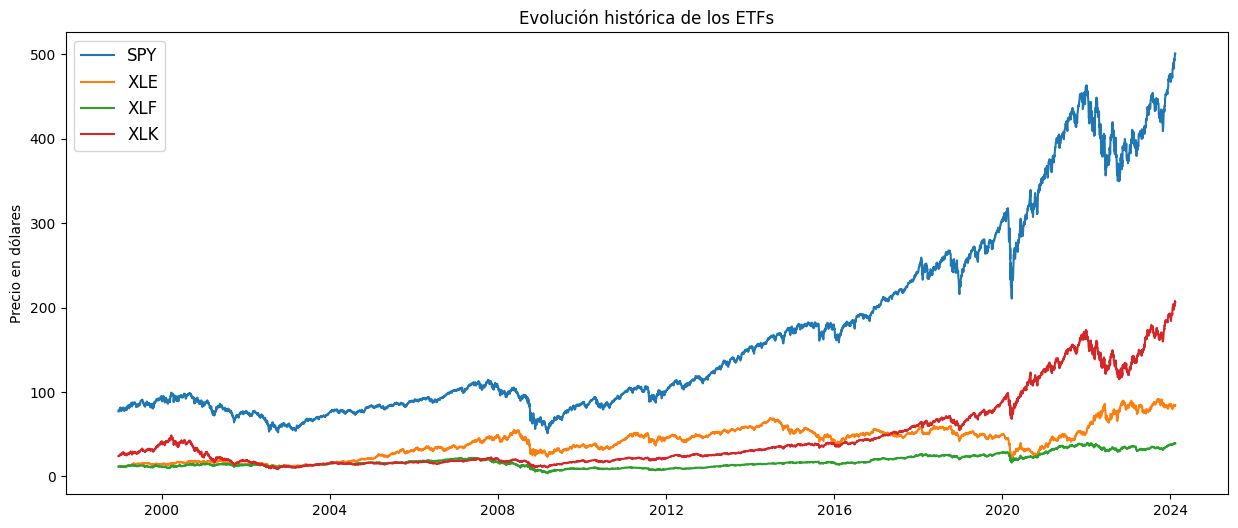

In [14]:
# Ahora lo que hacemos es grafícar el historial de precios
plt.figure(figsize=(15,6))
for i in range(data_final.shape[1]):
    plt.plot(data_final.iloc[:,i], label=data_final.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Precio en dólares')
plt.title('Evolución histórica de los ETFs')
plt.show()

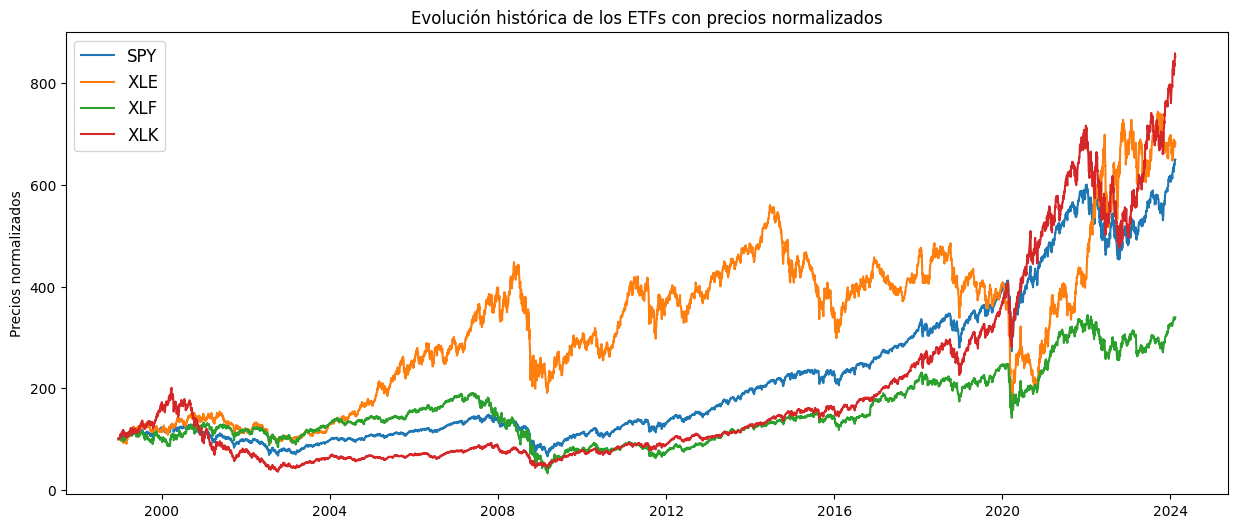

In [15]:
# Lo que sucede es que estas series de precios no estan en escala. Lo que es conveniente hacer en estos casos es:
# 1) Expresar los datos con una base determinada para que esten normalizados en torno a un valor
# 2) calcular los retornos y luego los retornos acumulados.
data_aux = data_final.divide(data_final.iloc[0] / 100)

plt.figure(figsize=(15, 6))
for i in range(data_aux.shape[1]):
    plt.plot(data_aux.iloc[:,i], label=data_aux.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Precios normalizados')
plt.title('Evolución histórica de los ETFs con precios normalizados')
plt.show()

##### Calculamos los retornos de cada una de la serie de datos y generamos los gráficos

In [16]:
# Lo primero que tenemos que verificar es que nuestra serie de datos este ordenada temporalmente
# en este caso ya lo sabemos pero en cualquier caso siempre podemos hacerlo ...
data_final = data_final.sort_values(by= 'Date', ascending=True)
data_final

Ticker             SPY        XLE        XLF         XLK
Date                                                    
1998-12-22   77.076233  12.329739  11.555721   24.189764
1998-12-23   78.692780  12.586439  11.726110   24.767679
1998-12-24   78.353561  12.520189  11.803562   24.673326
1998-12-28   78.153954  12.453944  11.648660   24.744081
1998-12-29   79.391327  12.578149  11.772584   24.814850
...                ...        ...        ...         ...
2024-02-06  493.980011  83.580002  38.830002  201.770004
2024-02-07  498.100006  83.750000  39.119999  204.440002
2024-02-08  498.320007  84.610001  38.970001  205.080002
2024-02-09  501.200012  83.309998  39.080002  207.839996
2024-02-12  500.980011  84.230003  39.259998  206.259995

[6325 rows x 4 columns]

In [17]:
# Calculamos los retonos de estas series y luego eliminamos los valores nulos de la primera fila
retornos = data_final / data_final.shift(1) - 1
retornos = retornos.dropna()
retornos

Ticker           SPY       XLE       XLF       XLK
Date                                              
1998-12-23  0.020973  0.020820  0.014745  0.023891
1998-12-24 -0.004311 -0.005264  0.006605 -0.003810
1998-12-28 -0.002548 -0.005291 -0.013123  0.002868
1998-12-29  0.015833  0.009973  0.010638  0.002860
1998-12-30 -0.008045 -0.015141 -0.003948 -0.003802
...              ...       ...       ...       ...
2024-02-06  0.002903  0.003241  0.002065 -0.004588
2024-02-07  0.008340  0.002034  0.007468  0.013233
2024-02-08  0.000442  0.010269 -0.003834  0.003130
2024-02-09  0.005779 -0.015365  0.002823  0.013458
2024-02-12 -0.000439  0.011043  0.004606 -0.007602

[6324 rows x 4 columns]

In [18]:
# Otra forma de poder haber calculado los retornos es a través del método pct_change() de pandas
retornos = data_final.pct_change()
retornos = retornos.dropna()
retornos

Ticker           SPY       XLE       XLF       XLK
Date                                              
1998-12-23  0.020973  0.020820  0.014745  0.023891
1998-12-24 -0.004311 -0.005264  0.006605 -0.003810
1998-12-28 -0.002548 -0.005291 -0.013123  0.002868
1998-12-29  0.015833  0.009973  0.010638  0.002860
1998-12-30 -0.008045 -0.015141 -0.003948 -0.003802
...              ...       ...       ...       ...
2024-02-06  0.002903  0.003241  0.002065 -0.004588
2024-02-07  0.008340  0.002034  0.007468  0.013233
2024-02-08  0.000442  0.010269 -0.003834  0.003130
2024-02-09  0.005779 -0.015365  0.002823  0.013458
2024-02-12 -0.000439  0.011043  0.004606 -0.007602

[6324 rows x 4 columns]

In [19]:
# Podemos hacer lo mismo pero en lugar de retornos relativos, retornos logarítimos que tienen
# la particularidad de que se pueden sumar por la propiedad de los logarítmos
log_retornos = np.log(data_final / data_final.shift(1))
log_retornos = log_retornos.dropna()
log_retornos

Ticker           SPY       XLE       XLF       XLK
Date                                              
1998-12-23  0.020756  0.020606  0.014637  0.023610
1998-12-24 -0.004320 -0.005277  0.006583 -0.003817
1998-12-28 -0.002551 -0.005305 -0.013210  0.002864
1998-12-29  0.015708  0.009924  0.010582  0.002856
1998-12-30 -0.008077 -0.015257 -0.003955 -0.003810
...              ...       ...       ...       ...
2024-02-06  0.002899  0.003236  0.002062 -0.004599
2024-02-07  0.008306  0.002032  0.007441  0.013146
2024-02-08  0.000442  0.010216 -0.003842  0.003126
2024-02-09  0.005763 -0.015484  0.002819  0.013368
2024-02-12 -0.000439  0.010983  0.004595 -0.007631

[6324 rows x 4 columns]

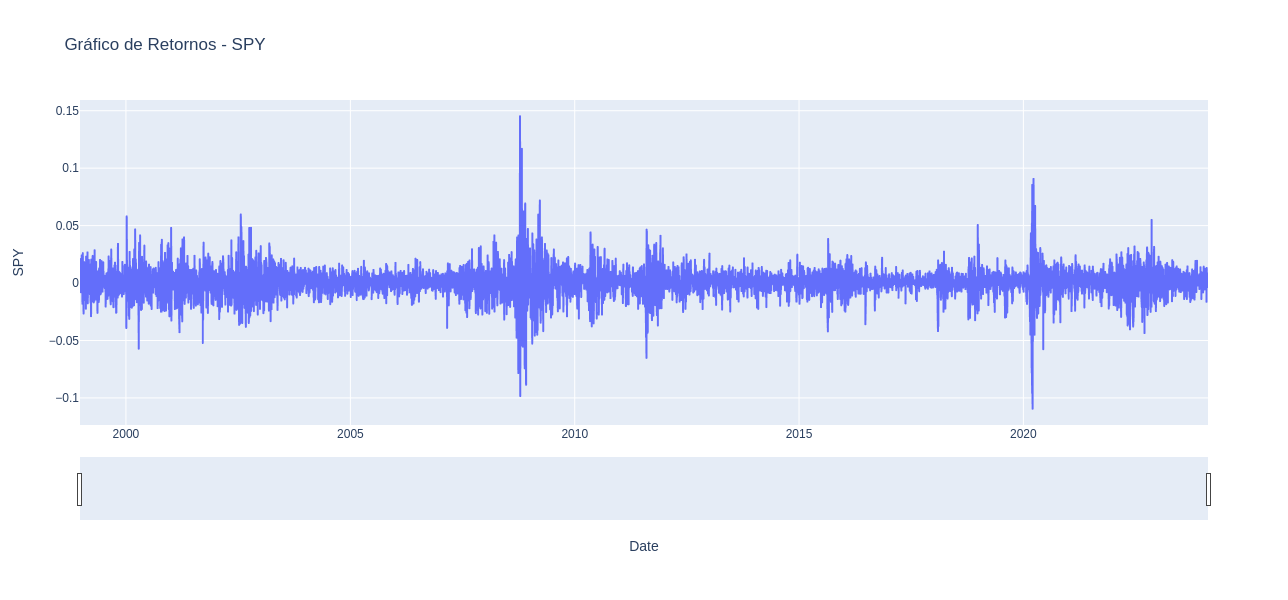

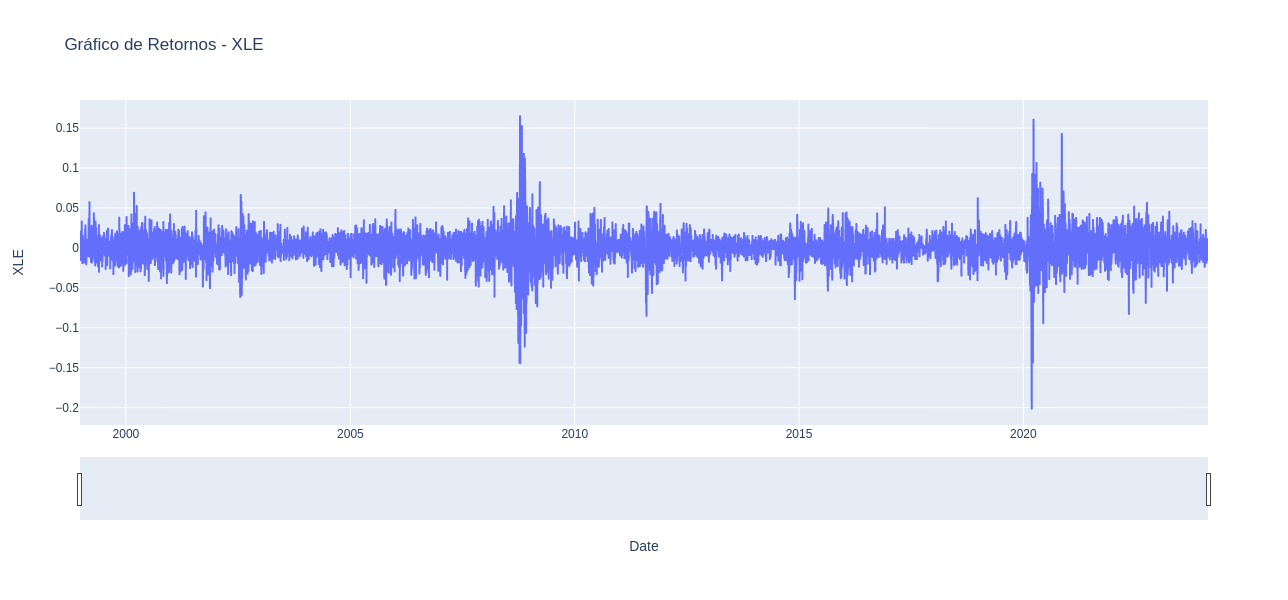

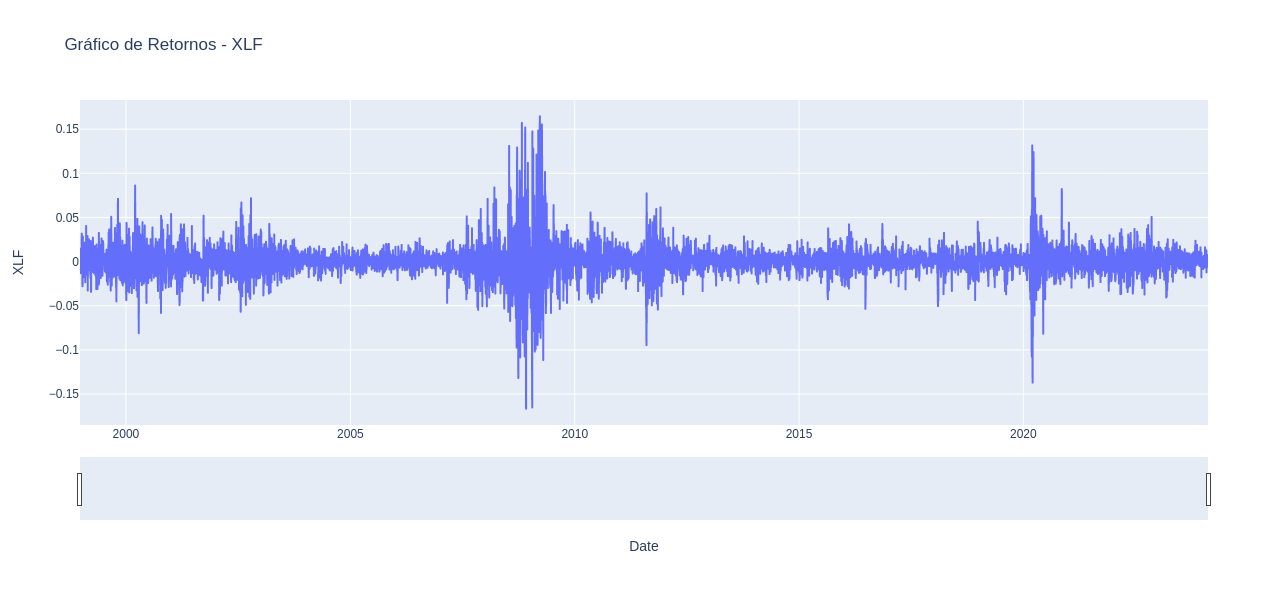

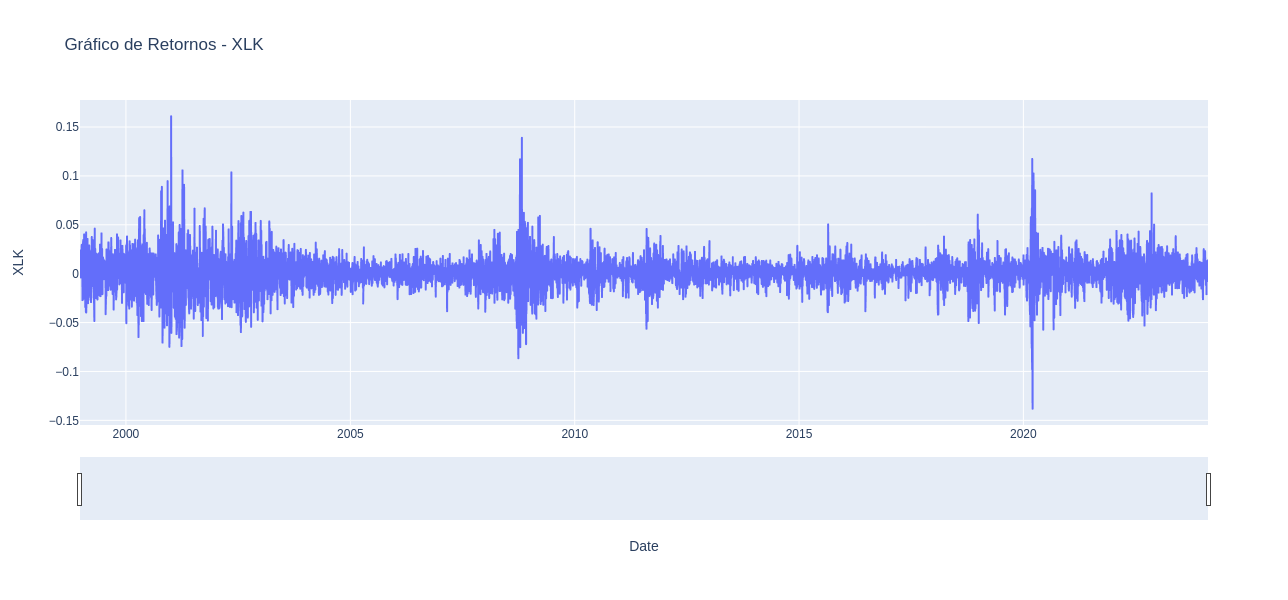

In [20]:
# Hacemos el gráfico de los retornos con plotly para que sea interactivo. En notebooks anteriores tenemos lo mismo con matplotlib
for i in retornos.columns:
    fig = px.line(retornos, x=retornos.index, y=i, title=f'Gráfico de Retornos - {i}')
    fig.update_layout(
        width=1300,
        height=600,
        xaxis_rangeslider_visible=True,
    )
    fig.show()

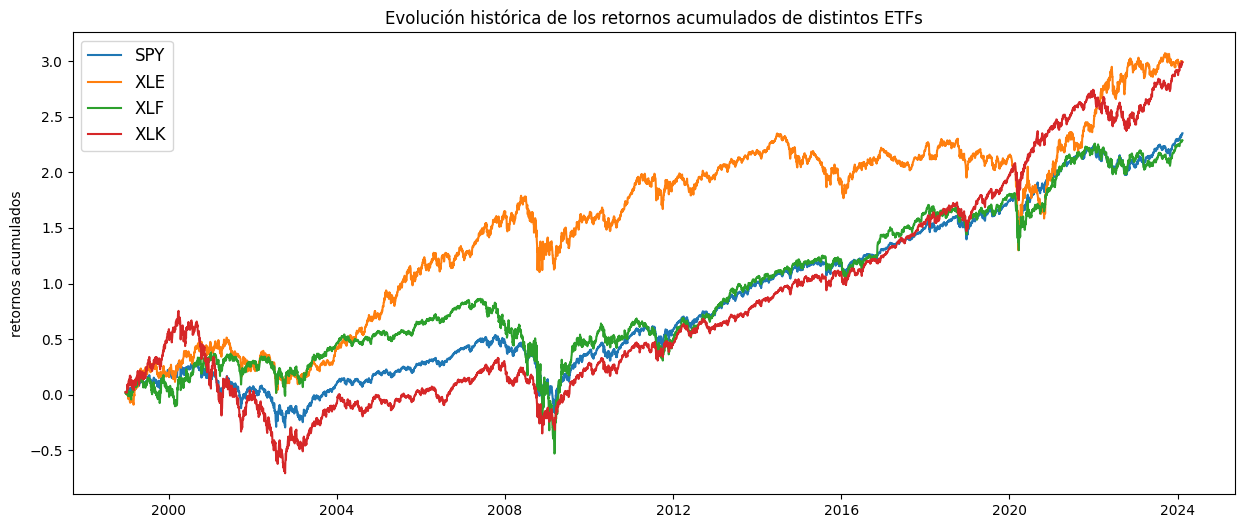

In [21]:
# Una vez que tenemos estos gráficos hacemos lo mismo pero con retornos acumulativos.
# Hay que tener en cuenta que este gráfico no tiene en cuenta la reinversión de los retornos de manera diaria.
retornos_aux = retornos.cumsum()

plt.figure(figsize=(15, 6))
for i in range(retornos_aux.shape[1]):
    plt.plot(retornos_aux.iloc[:,i], label=retornos_aux.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('retornos acumulados')
plt.title('Evolución histórica de los retornos acumulados de distintos ETFs')
plt.show()

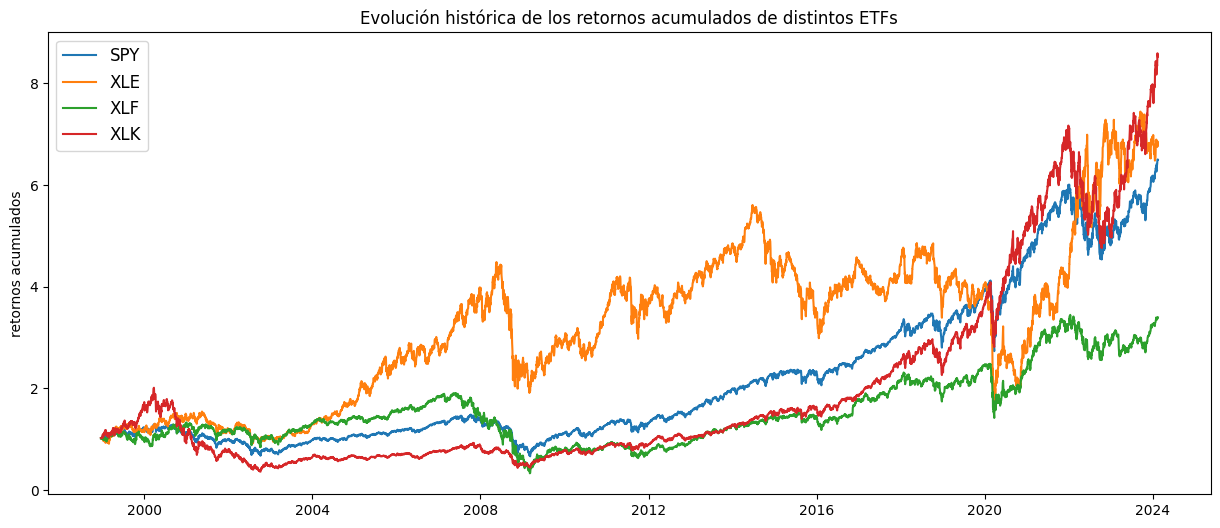

In [22]:
# Una vez que tenemos estos gráficos hacemos lo mismo pero con retornos acumulativos.
# Hay que tener en cuenta que este gráfico sí tiene en cuenta la reinversión de los retornos de manera diaria.
retornos_aux_dos = (1 + retornos).cumprod()

plt.figure(figsize=(15, 6))
for i in range(retornos_aux_dos.shape[1]):
    plt.plot(retornos_aux_dos.iloc[:,i], label=retornos_aux_dos.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('retornos acumulados')
plt.title('Evolución histórica de los retornos acumulados de distintos ETFs')
plt.show()

##### Analizamos como se comporta la distribución del SPY para ver si se parece a una normal

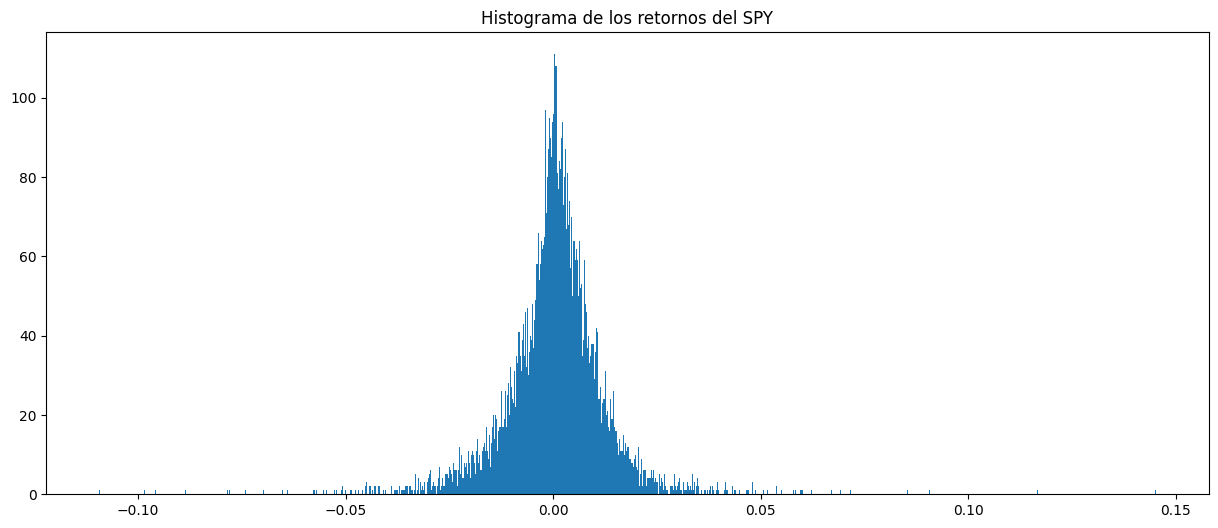

Media anualizada:0.09368186431383636


Desvío estandar (volatilidad):0.19529788055359476


Desvío estandar (volatilidad):0.05207471094935501


Oscilador de volatilidad:0.14322316960423975


Ratio de sharpe:0.4796870506135762


Curtosis de Fisher (en exceso):11.145510287598999


Curtosis de Pearson:14.145510287598999


Medida de asimetría:-0.007518346052672652


Estadístico de jarque bera:32732.661864857786
P-value de jarque bera:0.0




In [23]:
# Graficamos el histograma de la distribución
plt.figure(figsize=(15, 6))
plt.hist(retornos['SPY'], bins=1000)
plt.title("Histograma de los retornos del SPY")
plt.show()

# Adicionalmente vamos a calcular otras métricas relevantes. Retornos anualizados:
r = np.mean(retornos['SPY']) * 252
print('Media anualizada:' + str(r))
print('\n')

# Calculamos la volatilidad (desvío estandar) anualizado. Esta es la volatilidad histórica de toda la serie.
sigma = np.std(retornos['SPY']) * np.sqrt(252)
print('Desvío estandar (volatilidad):' + str(sigma))
print('\n')

# Calculamos la volatilidad (desvío estandar) anualizado. Esta es la volatilidad histórica de 5 ruedas (corto plazo)
sigma_corto = np.std(retornos['SPY'][-5:]) * np.sqrt(252)
print('Desvío estandar (volatilidad):' + str(sigma_corto))
print('\n')

# Calculamos un indicador que se suele hacer que es el oscilador de volatilidad
oscilador = sigma - sigma_corto
print('Oscilador de volatilidad:' + str(oscilador))
print('\n')

# Calculamos el ratio de sharpe del activo
ratio_sharpe = r / sigma
print('Ratio de sharpe:' + str(ratio_sharpe))
print('\n')

# Calculamos la curtosis en exceso
kurtosis_fisher = st.kurtosis(retornos['SPY'])
print('Curtosis de Fisher (en exceso):' + str(kurtosis_fisher))
print('\n')

# Calculamos la curtosis de pearson
kurtosis_pearson = st.kurtosis(retornos['SPY'], fisher=False)
print('Curtosis de Pearson:' + str(kurtosis_pearson))
print('\n')

# Calculamos la asimetría de la distribución
asimetria = st.skew(retornos['SPY'])
print('Medida de asimetría:' + str(asimetria))
print('\n')

# Calculamos el estadístico de jarque bera
jb = st.jarque_bera(retornos['SPY'])
print('Estadístico de jarque bera:' + str(jb.statistic))
print('P-value de jarque bera:' + str(jb.pvalue))
print('\n')

##### Puntos a tener en cuenta del análisis previo:

* Tener en cuenta que estas medidas pueden ir cambiando en el tiempo. Esto habla de la **ergodicidad** de las series que estamos analizando. Por eso siempre conviene analizar esto con distintas temporalidades.
* Cuando hablamos de riesgos tenemos que tener en cuenta que el **capital** es para hacer frente a pérdidas inesperadas y las previsiones son para hacer frente a pérdidas esperadas. Existen formas distintas para estimar los parámetros para cada casuística. Esto va a depender si estamos analizando ciclos económicos o queremos reflejar la historia más reciente.
* Tenemos una media anulizada positiva y una **asimetría** negativa. Esto es porque tenemos muchos días con retornos negativos para tenemos algunos rallys positivos que hacen que mi promedio suba. Los niveles normales de asimetría estan en [-0.5;0.5]
* La kurtosis es mayor a 0 (o mayor a 3) y esto nos habla de que tenemos colas más largas que la distribución normal. Es decir, tenemos mucha más probabilidad de eventos extremos ya sea positivos o negativos de los que nos diría una distribución normal. En estos casos podemos ver que esto presenta una distribución **leptocurtica**
* Podemos hacer todo este análisis sobre los precios pero se nos presentaría una distribución de frecuencias que sería multimodal y sería complejo de analizar. Una vez que diferenciamos nuestra serie tenemos algo más conocido y que podemos realizar inferencias. **Es por esto que trabajamos con retornos**. Esto esta relacionado al punto de que la media y la varianza varían con el tiempo. Al diferenciarlo fijamos la media.
* Nosotros siempre calculamos un rendimiento empírico o muestral. No significa que sea la media real o poblacional. Mientras más grande sea la volatilidad, el intervalo de confianza de la media real alrededor de la media empírica crece. Pero cuando tomamos más números eso se reduce.
* **Ley de los grandes números**: Si tomamos un promedio de un montón de variables aleatorias y todas tienen la misma media teorica, la media empírica va a converger a la media real. (Nos habla de la convergencia)
* **Teorema del límite central**: Dicha convergencia (de la media empírica a la media real) es según una distribución normal y que el desvío estandar converge a 0 (se divide por la raiz cuadrada de N) cuando la muestra es lo suficientemente grande y las variables aleatorias son independientes con media y varianza fija. Este teorema nos habla de la velocidad de convergencia.